In [1]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Problem Statement

Can you predict the type of the complaint based on the given variables?

# Objective

The goal here is to understand what factors contribute most to Complaint Type and create a model that can predict if a certain it. Need to analysis of Independent Variables and then model the algorithm

# Pipeline

1. Clean Data

2. Exploring the data will follow right after and allow further insight of what our dataset contains. 

3. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our prediction of categorical variable COMPLAINT TYPE

In [2]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\Brooklyn.csv",error_bad_lines=False)


In [3]:
df.compute()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842668,2014-04-14 12:35:00,2014-04-15 09:35:00,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,11210,1707 ALBANY AVENUE,...,Unspecified,BROOKLYN,40.631376,-73.936905,"(40.63137607740962, -73.93690514641224)",0.0,0.0,2014,4,0
1,27842678,2014-04-14 18:48:00,2014-04-14 18:55:00,DEP,Department of Environmental Protection,Water System,Hydrant Running (WC3),NaN,11226,398 PARKSIDE AVENUE,...,Unspecified,BROOKLYN,40.655759,-73.957915,"(40.65575937956233, -73.957915385467)",0.0,0.0,2014,4,0
2,27842679,2014-04-14 13:21:00,2014-04-14 13:22:00,DEP,Department of Environmental Protection,Water System,Hydrant Running (WC3),NaN,11226,24 PARKSIDE AVENUE,...,Unspecified,BROOKLYN,40.651769,-73.969825,"(40.651769462936095, -73.96982500664355)",0.0,0.0,2014,4,0
3,27842681,2014-04-14 12:32:00,2014-04-14 12:33:00,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11214,2107 79 STREET,...,Unspecified,BROOKLYN,40.606984,-73.991504,"(40.606983639606455, -73.9915042331188)",0.0,0.0,2014,4,0
4,27842684,2014-04-14 00:00:00,2014-05-19 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11217,STATE STREET,...,Unspecified,BROOKLYN,40.685576,-73.979275,"(40.68557622732326, -73.97927459764733)",35.0,35.0,2014,4,0
5,27842685,2014-04-14 15:11:00,2014-04-14 19:25:00,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11201,400 HICKS STREET,...,Unspecified,BROOKLYN,40.689064,-73.999232,"(40.689063949985375, -73.9992319517107)",0.0,0.0,2014,4,0
6,27842686,2014-04-14 14:41:00,2014-04-14 20:50:00,DEP,Department of Environmental Protection,Water System,No Water/Low Pressure (WA5),NaN,11236,752 EAST 78 STREET,...,Unspecified,BROOKLYN,40.635139,-73.915435,"(40.635139121129946, -73.91543522425351)",0.0,0.0,2014,4,0
7,27842687,2014-04-14 12:31:00,2014-04-16 10:05:00,DEP,Department of Environmental Protection,Water System,Other Water Problem (Use Comments) (WZZ),NaN,11211,NaN,...,Unspecified,BROOKLYN,40.707596,-73.961861,"(40.707595790014565, -73.96186102985845)",1.0,1.0,2014,4,0
8,27842706,2014-04-14 00:00:00,2014-04-18 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11226,2409 BEVERLY ROAD,...,Unspecified,BROOKLYN,40.644793,-73.954578,"(40.644792701370726, -73.95457828379143)",4.0,4.0,2014,4,0
9,27842708,2014-04-14 00:00:00,2014-05-02 11:47:37,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11235,637 BANNER AVENUE,...,Unspecified,BROOKLYN,40.583210,-73.962047,"(40.58321047357196, -73.9620472674295)",18.0,18.0,2014,4,0


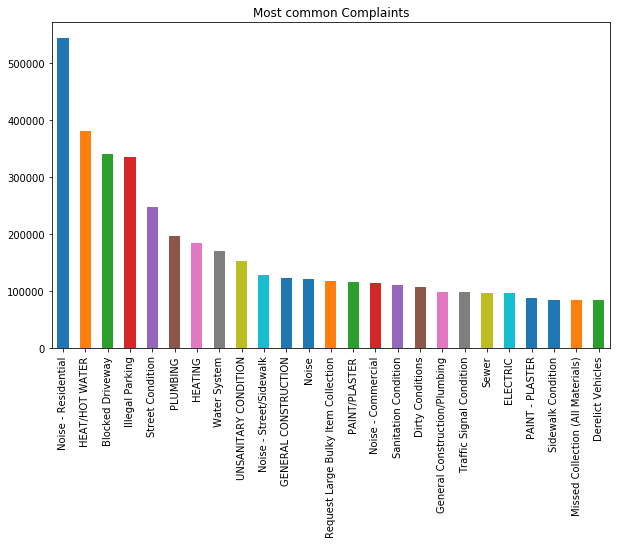

In [4]:
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

### Applying Lemmitization for Resolution Description Ex: cats --> cat

In [5]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame()

,Resolution Description
0,The Department of Environmental Protection resolved this complaint by speaking to the complainant on the phone.
1,The Department of Environmental Protection determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
2,The Department of Health and Mental Hygiene will review your complaint to determine appropriate action. Complaints of this type usually result in an inspection. Please call 311 in 30 days from the date of your complaint for status
3,"The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint."
4,The Department of Environmental Protection investigated this complaint and determined it is an inside condition within the complainant's property.
5,The Department of Environmental Protection investigated this complaint and repaired or replaced the hydrant.
6,The Department of Transportation inspected this complaint and repaired the problem.
7,The Department of Transportation inspected this complaint and did not find the reported problem.
8,The Department of Sanitation removed the items.
9,Service Request status for this request is available on the Department of Transportationâs website. Please click the âLearn Moreâ link below.


In [6]:
#[k for k, v in locals().items() if isinstance(v, str) and v == df["Resolution Description"]][0]
df["Resolution Description"]= df["Resolution Description"].astype(str) 

#### Remove Digits
#### Remove Punctuation
#### Remove StopWords   Ex:A AN THE IS .....
###### StemPorter does the below     root word "like" include:->"likes"->"liked"->"likely"->"liking"


In [7]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)

df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [9]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame().head()

,Resolution Description
0,department environmental protection resolved complaint speaking complainant phon
1,department environmental protection determined complaint duplicate previously filed complaint original complaint address
2,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
3,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
4,department environmental protection investigated complaint determined inside condition within complainants properti


#### Descriptor

In [10]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,Dirty Water (WE)
1,Hydrant Running (WC3)
2,Leak (Use Comments) (WA2)
3,Rat Sighting
4,No Water/Low Pressure (WA5)


##### Applying ABOVE to Descriptor

In [11]:
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df['Descriptor']= df['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial

In [12]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,dirty water w
1,hydrant running wc
2,leak use comments wa
3,rat sight
4,waterlow pressure wa


In [13]:
pd.set_option('display.max_rows',500)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842668,2014-04-14 12:35:00,2014-04-15 09:35:00,DEP,Department of Environmental Protection,Water System,dirty water w,NaN,11210,1707 ALBANY AVENUE,...,Unspecified,BROOKLYN,40.631376,-73.936905,"(40.63137607740962, -73.93690514641224)",0.0,0.0,2014,4,0
1,27842678,2014-04-14 18:48:00,2014-04-14 18:55:00,DEP,Department of Environmental Protection,Water System,hydrant running wc,NaN,11226,398 PARKSIDE AVENUE,...,Unspecified,BROOKLYN,40.655759,-73.957915,"(40.65575937956233, -73.957915385467)",0.0,0.0,2014,4,0
2,27842679,2014-04-14 13:21:00,2014-04-14 13:22:00,DEP,Department of Environmental Protection,Water System,hydrant running wc,NaN,11226,24 PARKSIDE AVENUE,...,Unspecified,BROOKLYN,40.651769,-73.969825,"(40.651769462936095, -73.96982500664355)",0.0,0.0,2014,4,0
3,27842681,2014-04-14 12:32:00,2014-04-14 12:33:00,DEP,Department of Environmental Protection,Water System,leak use comments wa,NaN,11214,2107 79 STREET,...,Unspecified,BROOKLYN,40.606984,-73.991504,"(40.606983639606455, -73.9915042331188)",0.0,0.0,2014,4,0
4,27842684,2014-04-14 00:00:00,2014-05-19 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,rat sight,Other (Explain Below),11217,STATE STREET,...,Unspecified,BROOKLYN,40.685576,-73.979275,"(40.68557622732326, -73.97927459764733)",35.0,35.0,2014,4,0


##### Checking our Descriptors with Target Variable

In [14]:
df[['Complaint Type','Agency','Descriptor','Resolution Description']].head()

,Complaint Type,Agency,Descriptor,Resolution Description
0,Water System,DEP,dirty water w,department environmental protection resolved complaint speaking complainant phon
1,Water System,DEP,hydrant running wc,department environmental protection determined complaint duplicate previously filed complaint original complaint address
2,Water System,DEP,hydrant running wc,department environmental protection determined complaint duplicate previously filed complaint original complaint address
3,Water System,DEP,leak use comments wa,department environmental protection determined complaint duplicate previously filed complaint original complaint address
4,Rodent,DOHMH,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu


#### I would make use of descriptor/n in my model or atleast while refining my target variable I would use it

In [15]:
df[['Location Type','Location','Latitude','Longitude']].head()

,Location Type,Location,Latitude,Longitude
0,NaN,"(40.63137607740962, -73.93690514641224)",40.631376,-73.936905
1,NaN,"(40.65575937956233, -73.957915385467)",40.655759,-73.957915
2,NaN,"(40.651769462936095, -73.96982500664355)",40.651769,-73.969825
3,NaN,"(40.606983639606455, -73.9915042331188)",40.606984,-73.991504
4,Other (Explain Below),"(40.68557622732326, -73.97927459764733)",40.685576,-73.979275


## Check out for plots after conversion to pandas dataframe

##### CHECK MISSING VALUES BY %

In [16]:
missing_values = df.isnull().sum()
missing_count = ((missing_values / df.index.size) * 100)
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct


[########################################] | 100% Completed | 10min 45.6s


Unique Key                        0.000000 
Created Date                      0.000000 
Closed Date                       0.000000 
Agency                            0.000000 
Agency Name                       0.000000 
Complaint Type                    0.000000 
Descriptor                        0.000000 
Location Type                     19.015237
Incident Zip                      0.000000 
Incident Address                  13.692739
Street Name                       13.693649
Cross Street 1                    30.588049
Cross Street 2                    30.643643
Address Type                      3.775409 
City                              0.000000 
Status                            0.000000 
Resolution Description            0.000000 
Resolution Action Updated Date    0.000000 
Community Board                   0.000000 
BBL                               15.608745
Borough                           0.000000 
X Coordinate (State Plane)        3.423325 
Y Coordinate (State Plane)      

##### Here are some of the conclusions I can draw
1. None of the Values are above 50% missing so its fine to keep
2.I dont think even the variables like Location Type /Street Name would be of use to the model as we already have "Location"
3. Location,Latitude and Logitude are missing by just 4% (Negligible)
4. Need to analyze address type column and see if it is of use
5. I would use below columns for my model
6. Need to status of complaint over years
7. Target Variable have nans? ------ NO beacuse we already seen the graph above that ahs no major nulls
8. Location = (Latitude,Longitude)
8. Our Target variable is complaint type so status of incident is not a requirement in model for now
"Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude",,"Total_Time","Resolution_Time","Year","Month ","DayofWeek"  ----> 15 Independent Variables


#### Location Type

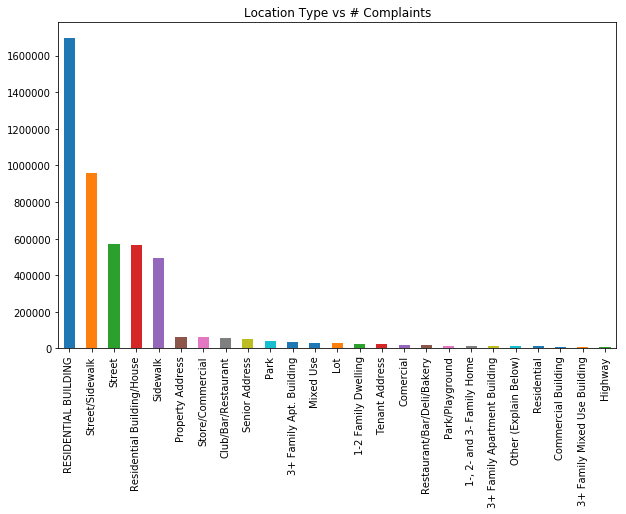

In [17]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

###### LOCATION TYPE: Remove Punctuations and convert them into lowe case 

In [18]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:2259: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


In [19]:
df['Location Type'].head()

0    nan                
1    nan                
2    nan                
3    nan                
4    other explain below
Name: Location Type, dtype: object

In [20]:
location_type = df['Location Type'].value_counts().compute()
location_type = location_type.sort_values(ascending=True)
#Reversing array as maximum number of complaintS should appear first 
location_type[::-1]

residential building                  1699496
nan                                   1149932
streetsidewalk                        960200 
street                                570144 
residential buildinghouse             562855 
sidewalk                              493739 
property address                      63421  
storecommercial                       62724  
clubbarrestaurant                     58518  
senior address                        54118  
park                                  40306  
3 family apt building                 36953  
mixed use                             27892  
lot                                   27571  
12 family dwelling                    25768  
tenant address                        25749  
comercial                             17487  
restaurantbardelibakery               16410  
parkplayground                        14367  
1 2 and 3 family home                 13664  
3 family apartment building           13225  
other explain below               

In [21]:
df[["Location","Location Type","Latitude","Longitude","Incident Address","Address Type"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address,Address Type
0,"(40.63137607740962, -73.93690514641224)",nan,40.631376,-73.936905,1707 ALBANY AVENUE,ADDRESS
1,"(40.65575937956233, -73.957915385467)",nan,40.655759,-73.957915,398 PARKSIDE AVENUE,ADDRESS
2,"(40.651769462936095, -73.96982500664355)",nan,40.651769,-73.969825,24 PARKSIDE AVENUE,ADDRESS
3,"(40.606983639606455, -73.9915042331188)",nan,40.606984,-73.991504,2107 79 STREET,ADDRESS
4,"(40.68557622732326, -73.97927459764733)",other explain below,40.685576,-73.979275,STATE STREET,BLOCKFACE
5,"(40.689063949985375, -73.9992319517107)",nan,40.689064,-73.999232,400 HICKS STREET,ADDRESS
6,"(40.635139121129946, -73.91543522425351)",nan,40.635139,-73.915435,752 EAST 78 STREET,ADDRESS
7,"(40.707595790014565, -73.96186102985845)",nan,40.707596,-73.961861,NaN,INTERSECTION
8,"(40.644792701370726, -73.95457828379143)",12 family dwelling,40.644793,-73.954578,2409 BEVERLY ROAD,ADDRESS
9,"(40.58321047357196, -73.9620472674295)",3 family mixed use building,40.583210,-73.962047,637 BANNER AVENUE,ADDRESS


1. Locaion Type has >80000 null values which is bit bothering
2. First Can we predict Location Type?
3. If so How to to predict it/Check Acurracy?   --> Agency , Latitude, Longitude, Incizent Zip lets try ...
4. Incident Address Cannot identify the type of location at all

In [22]:
df["Address Type"].unique()

Dask Series Structure:
npartitions=1
    object
    ...   
Name: Address Type, dtype: object
Dask Name: unique-agg, 2384 tasks

#############################################################################################################
############################################################################################################
###############################################################################################################
##################################################################################################################
####################################################################################################################

## Converting DASK to Pandas Dataframe

In [23]:
df = df.compute()

In [24]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
9411,27842616,2014-04-14 08:23:00,2014-04-18 09:45:00,DEP,Department of Environmental Protection,Air Quality,air dust constructiondemolition a,nan,11215,NaN,...,Unspecified,BROOKLYN,40.673398,-73.982782,"(40.67339824596639, -73.98278245521594)",4.0,4.0,2014,4,0
9412,27842625,2014-04-14 10:49:00,2014-04-15 12:05:00,DEP,Department of Environmental Protection,Water System,leak use comments wa,nan,11224,2811 WEST 31 STREET,...,Unspecified,BROOKLYN,40.576972,-73.997808,"(40.57697229522806, -73.99780771630661)",1.0,1.0,2014,4,0
9413,27842626,2014-04-14 09:21:00,2014-05-22 08:30:00,DEP,Department of Environmental Protection,Water System,leak use comments wa,nan,11206,491 WILLOUGHBY AVENUE,...,Unspecified,BROOKLYN,40.693780,-73.950063,"(40.69377961105323, -73.95006250922422)",37.0,37.0,2014,4,0
9414,27842638,2014-04-14 23:25:00,2014-04-21 23:45:00,DEP,Department of Environmental Protection,Noise,noise construction beforeafter hours nm,nan,11222,139 BEADEL STREET,...,Unspecified,BROOKLYN,40.722266,-73.935517,"(40.722265777326385, -73.93551673468365)",7.0,7.0,2014,4,0
9415,27842652,2014-04-14 12:21:00,2014-04-20 18:30:00,DEP,Department of Environmental Protection,Sewer,defectivemissing curb piece sc,nan,11228,NaN,...,Unspecified,BROOKLYN,40.618946,-73.999035,"(40.61894576099455, -73.99903464452899)",6.0,6.0,2014,4,0


##### Removing NULL values of Location Latitude and Longitude from my dataset as they constitude 4% of missing values

In [25]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]

###### Analysisng our Target Variable with IVs

(-78.40718565560199, -73.5964393285601, 39.48161604750184, 40.92915723701006)

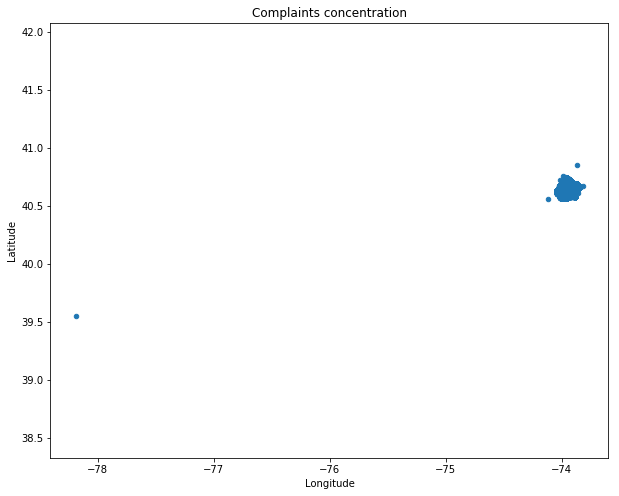

In [26]:
df.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration').axis('equal')

(-78.18450808209232, -73.81911690206978, 39.5525551788817, 40.858218105630215)

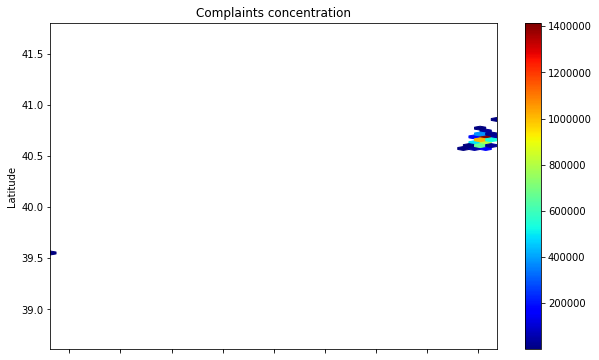

In [27]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,colormap = 'jet',mincnt=1,title = 'Complaints concentration', figsize=(10,6)).axis('equal')

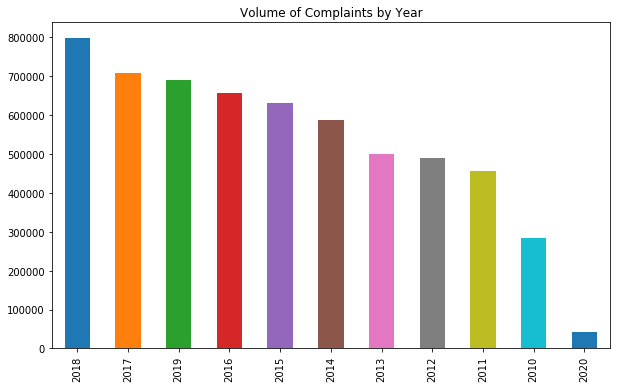

In [28]:
##### Complaints by Year 

df['Year'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Year')

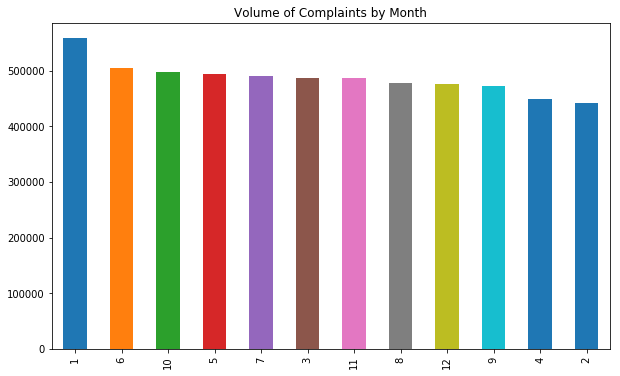

In [29]:
df['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Month')

#### January,October-Novemeber and May are of most complaints

#############################################################################################################
#############################################################################################################

### Complaint Type : Target Variable Analysis and MeRGINGS

In [30]:
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)

df['Complaint Type'] = df['Complaint Type'].apply(to_lower)

In [31]:
df['Complaint Type'].value_counts()

noise  residential                       543477
heathot water                            381073
blocked driveway                         341272
illegal parking                          334638
street condition                         245597
plumbing                                 211807
heating                                  185377
water system                             170806
unsanitary condition                     154670
noise  streetsidewalk                    128043
general construction                     124164
noise                                    121117
request large bulky item collection      118902
paintplaster                             115844
noise  commercial                        114595
sanitation condition                     110698
dirty conditions                         108155
general constructionplumbing             99550 
traffic signal condition                 99036 
electric                                 96992 
sewer                                   

In [32]:
df[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,water system,dirty water w
1,water system,hydrant running wc
2,water system,hydrant running wc
3,water system,leak use comments wa
4,rodent,rat sight
5,water system,leak use comments wa
6,water system,waterlow pressure wa
7,water system,water problem use comments wzz
8,rodent,rat sight
9,rodent,rat sight


###### Heat Complaints

In [33]:
df[df['Complaint Type'].str.contains("cool") ][['Complaint Type',"Descriptor"]]

,Complaint Type,Descriptor
105113,cooling tower,brokendefect
107177,cooling tower,unsanitary condit
62970,cooling tower,unsanitary condit
8546,cooling tower,unsanitary condit
8945,cooling tower,brokendefect
91427,cooling tower,unsanitary condit
59668,cooling tower,unsanitary condit
75298,cooling tower,brokendefect
81265,cooling tower,brokendefect
87884,cooling tower,unsanitary condit


In [34]:
df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique()

array(['heathot water', 'nonresidential heat', 'heating'], dtype=object)

In [35]:
df['Complaint Type'] = df['Complaint Type'].replace(['heathot water', 'nonresidential heat','heating'], 'HeatComplaints')

##### Noise Complaints

In [36]:
df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique()

array(['noise', 'collection truck noise', 'noise  residential',
       'noise  commercial', 'noise  vehicle', 'noise  streetsidewalk',
       'noise  park', 'noise  house of worship', 'noise  helicopter',
       'noise survey'], dtype=object)

##### Whats a Noise Survey Means?

In [37]:
df[df['Complaint Type'].str.contains("noise survey") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
103381,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
103386,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
103388,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
103389,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
103390,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1


###### Its noise created by people and they 3-1-1 to complain. 311 is non emergency phone number

In [38]:
df['Complaint Type'] = df['Complaint Type'].replace(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], 'NoiseComplaints')

##### Construction/Plumbing Complaints

In [39]:
df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique()

array(['plumbing', 'general constructionplumbing',
       'construction safety enforcement', 'construction lead dust',
       'general construction', 'construction'], dtype=object)

In [40]:
df['Complaint Type'] = df['Complaint Type'].replace(['general constructionplumbing', 'construction safety enforcement',
       'construction lead dust', 'general construction', 'construction','plumbing'],'Construction/PlumbingComplaints')

###### Parking Complaints

In [41]:
df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique()

array(['illegal parking', 'blocked driveway', 'violation of park rules',
       'animal in a park', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking'], dtype=object)

In [42]:
df[df['Complaint Type'].str.contains("dof parking  payment issue") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency


##### Note dof parking payment: comes under dof issues because you will know what type of complaint in descriptor

In [43]:
# Note dof parking payment comes under dof issues because you will know what type of complaint in descriptor

df['Complaint Type'] = df['Complaint Type'].replace(['illegal parking', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking','violation of park rules','blocked driveway'],'ParkingComplaints')

##### DOF issues (Department of Fiance)

In [44]:
df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique()

array(['dof property  payment issue', 'dof property  reduction issue'],
      dtype=object)

In [45]:
df['Complaint Type'] = df['Complaint Type'].replace(['dof property  payment issue', 'dof property  owner issue',
       'dof property  request copy', 'dof property  reduction issue',
       'dof property  city rebate', 'dof parking  payment issue',
       'dof property  property value', 'dof property  rpie issue',
       'dof property  state rebate', 'dof parking  tax exemption',
       'dof property  update account'],'DOFComplaints')

###### Paint Plaster Issues

In [46]:
df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique()

array(['paintplaster', 'paint  plaster'], dtype=object)

In [47]:
df['Complaint Type'] = df['Complaint Type'].replace(['paintplaster', 'paint  plaster'],'Paint/PlasterComplaints')

##### Water Complaints

In [48]:
df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique()

array(['water system', 'water leak', 'water conservation',
       'standing water', 'water quality', 'drinking water',
       'bottled water'], dtype=object)

In [49]:
df['Complaint Type'] = df['Complaint Type'].replace(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'],'WaterComplaints')

##### SanitaryCompalints

In [50]:
df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique()

array(['dirty conditions', 'sanitation condition'], dtype=object)

In [51]:
df['Complaint Type'] = df['Complaint Type'].replace(['unsanitary pigeon condition',
    'unsanitary condition','dirty conditions','unsanitary animal pvt property','sanitation condition'],'SanitationComplaints')

###### Highway Complaints

In [52]:
df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique()

array(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'], dtype=object)

In [53]:
df['Complaint Type'] = df['Complaint Type'].replace(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'],'HighwayComplaints')

###### Street/Vehicle/TreeCompalints

In [54]:
df[df['Complaint Type'].str.contains("tree|sidewalk|vehicle") ]["Complaint Type"].unique()

array(['street condition', 'derelict vehicles', 'street light condition',
       'street sign  damaged', 'street sign  dangling',
       'sidewalk condition', 'derelict vehicle', 'damaged tree',
       'new tree request', 'for hire vehicle complaint',
       'rootsewersidewalk condition', 'street sign  missing', 'dead tree',
       'illegal tree damage', 'overgrown treebranches',
       'for hire vehicle report', 'request xmas tree collection',
       'deaddying tree', 'abandoned vehicle', 'dep street condition',
       'homeless street condition', 'city vehicle placard complaint'],
      dtype=object)

###### Checking ("request xmas tree collection","homeless street condition")

In [55]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("request xmas tree collection","homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
27652,c request xmas trees collect,department sanitation cleaned loc
78418,c request xmas trees collect,department sanitation removed item
78662,c request xmas trees collect,department sanitation collected requested item
78921,c request xmas trees collect,department sanitation cleaned loc
78929,c request xmas trees collect,department sanitation removed item


In [56]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
83760,nan,police department responded complaint information available observed evid
85779,nan,police department responded complaint determined police action necessari
86119,nan,police department responded complaint information available observed evid
91034,nan,police department responded upon arrival responsible condition gon
101292,nan,police department responded complaint determined police action necessari


In [57]:
#graffiti
pd.set_option('display.max_colwidth', 1)

df[df['Complaint Type'].str.contains("graffiti") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
92,graffiti,city inspected property cleaning graffiti found
94,graffiti,city inspected property cleaning graffiti found
433,graffiti,city removed graffiti properti
560,graffiti,city inspected property cleaning graffiti found
619,graffiti,city inspected property cleaning graffiti found


##### I am removing homeless street condition as it comes under HomelessComplaints

In [58]:
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

##### Sewer Complaints,Traffic,Homeless

In [59]:
df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique()


array(['sewer', 'indoor sewage'], dtype=object)

In [60]:
df['Complaint Type'] = df['Complaint Type'].replace(['sewer','indoor sewage'],'SewerComplaints')

##### Homeless Complaints

In [61]:
df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique()

array(['homeless encampment', 'homeless person assistance',
       'homeless street condition'], dtype=object)

In [62]:
df['Complaint Type'] = df['Complaint Type'].replace(['homeless street condition',
                                                     'homeless encampment', 'homeless person assistance'],'HomelessComplaints')

In [63]:
df[df['Complaint Type'].str.contains("traffic|signal") ]["Complaint Type"].unique()

array(['traffic signal condition', 'traffic'], dtype=object)

In [64]:
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')

##### Taxi Complaints

In [65]:
df[df['Complaint Type'].str.contains("taxi") ]["Complaint Type"].unique()

array(['taxi complaint', 'taxi report', 'green taxi report',
       'taxi compliment'], dtype=object)

In [66]:
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')

###### Building Complaints

In [67]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ]["Complaint Type"].unique()

array(['buildinguse', 'doorwindow', 'flooringstairs', 'outside building',
       'building marshals office', 'building condition'], dtype=object)

###### Checking the Building Complaints in detail

In [68]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ][["Complaint Type","Descriptor","Resolution Description"]]

,Complaint Type,Descriptor,Resolution Description
49,buildinguse,certificate occupancyillegalcontrary co,department buildings investigated complaint determined action necessari
51,buildinguse,certificate occupancyillegalcontrary co,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
54,doorwindow,door,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
55,doorwindow,door,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
56,doorwindow,window fram,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
57,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
58,flooringstairs,floor,department housing preservation development able gain access inspect following conditions complaint closed condition still exists please file new complaint
59,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
61,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
62,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd


In [69]:
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')

##### Rodent

In [70]:
df[df['Complaint Type'].str.contains("rodent|cockroach|pest") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
4,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
8,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
9,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
87,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
198,condition attracting rod,updated status complaint go online nycgov use check status field call


In [71]:
df[df['Complaint Type'].str.contains("broken muni meter") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
22338,coin card regist,general maintenance cleaning regular schedule next scheduled maintenance cleaning correct condit
24958,receipt,department transportation inspected condition reported find additional information notes customer field
28074,coin card regist,general maintenance cleaning regular schedule next scheduled maintenance cleaning correct condit
41338,coin card regist,department transportation inspected condition reported find additional information notes customer field
42835,order,department transportation inspected condition reported find additional information notes customer field


In [72]:
df[df['Complaint Type'].str.contains("request large bulky item collection") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
93054,request large bulky item collect,nan
93246,request large bulky item collect,nan
93323,request large bulky item collect,nan
93329,request large bulky item collect,nan
93497,request large bulky item collect,nan


In [73]:
df['Complaint Type'].value_counts()

NoiseComplaints                          988432
StreetComplaints                         855790
ParkingComplaints                        693998
HeatComplaints                           566484
Construction/PlumbingComplaints          444245
SanitationComplaints                     379811
WaterComplaints                          259741
BuildingComplaints                       224772
Paint/PlasterComplaints                  204010
request large bulky item collection      118902
TrafficComplaints                        110124
SewerComplaints                          100244
electric                                 96992 
missed collection all materials          85276 
rodent                                   83383 
nonconst                                 65550 
general                                  47744 
consumer complaint                       44268 
broken muni meter                        30243 
appliance                                29912 
snow                                    

In [74]:
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [75]:
df['Complaint Type'].value_counts()

NoiseComplaints                        988432
StreetComplaints                       855790
ParkingComplaints                      693998
HeatComplaints                         566484
Construction/PlumbingComplaints        444245
SanitationComplaints                   379811
Other Complaints                       347495
WaterComplaints                        259741
BuildingComplaints                     224772
Paint/PlasterComplaints                204010
request large bulky item collection    118902
TrafficComplaints                      110124
SewerComplaints                        100244
electric                               96992 
missed collection all materials        85276 
rodent                                 83383 
nonconst                               65550 
general                                47744 
consumer complaint                     44268 
broken muni meter                      30243 
TaxiComplaints                         21525 
air quality                       

In [76]:
df[df['Complaint Type'].str.contains("vending|food establishment") ][["Complaint Type","Descriptor","Resolution Description"]].head()

,Complaint Type,Descriptor,Resolution Description
13189,food establishment,food contamin,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
38757,vending,unlicens,police department responded complaint information available observed evidence violation tim
63297,vending,unlicens,police department responded upon arrival responsible condition gon
75016,vending,unlicens,police department responded complaint took action fix condit
105921,vending,unlicens,police department responded complaint took action fix condit


In [77]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')

##### Vending Complaints comes uder Street Complaints

In [78]:
df['Complaint Type'].value_counts()

NoiseComplaints                        988432
StreetComplaints                       862840
ParkingComplaints                      693998
HeatComplaints                         566484
Construction/PlumbingComplaints        444245
SanitationComplaints                   379811
Other Complaints                       347495
WaterComplaints                        259741
BuildingComplaints                     224772
Paint/PlasterComplaints                204010
request large bulky item collection    118902
TrafficComplaints                      110124
SewerComplaints                        100244
electric                               96992 
missed collection all materials        85276 
rodent                                 83383 
nonconst                               65550 
general                                47744 
consumer complaint                     44268 
broken muni meter                      30243 
TaxiComplaints                         21525 
air quality                       

##### Revisiting Location Type (Only doing it for highest amount of variables)

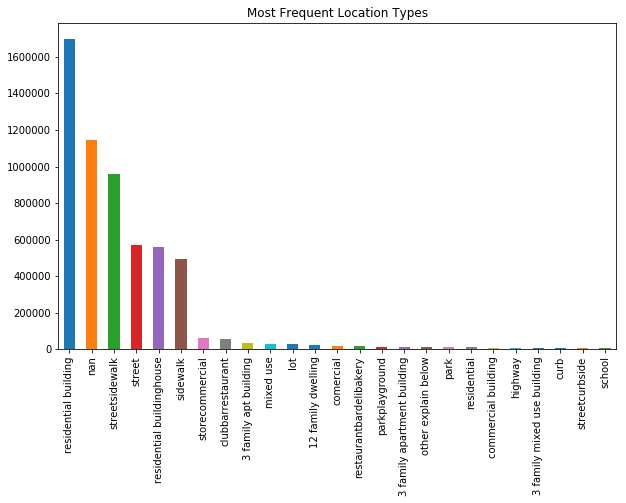

In [79]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

In [80]:
df['Location Type'].unique()

array(['nan', 'other explain below', '12 family dwelling',
       '3 family mixed use building', 'street', 'sidewalk',
       'residential building', 'lot', '3 family apt building',
       'comercial', '3 family apartment building', 'streetsidewalk',
       'residential', 'commercial building', 'mixed use',
       'residential buildinghouse', 'clubbarrestaurant',
       'vacant building', 'other', '12 family mixed use building',
       'construction site', 'parking lotgarage', 'vacant lot',
       'abandoned building', 'bridge', 'catch basinsewer', 'highway',
       'school', 'schoolpreschool', 'restaurantbardelibakery',
       'day carenursery', 'bus stop shelter', 'single room occupancy sro',
       'park', 'public garden', 'storecommercial', 'parkplayground',
       'hospital', 'public gardenpark', 'crosswalk', 'public stairs',
       'beach', 'tire shop', 'streetcurbside', 'pool',
       'government building', 'office building', 'house of worship',
       'curb', 'parking lot', 'co

In [81]:
df[df['Location Type'].str.contains("residential") ]["Location Type"].unique()

array(['residential building', 'residential', 'residential buildinghouse',
       'residential property', 'building nonresidential'], dtype=object)

In [82]:
df['Location Type'] = df['Location Type'].replace(['residential building', 'residential', 'residential buildinghouse',
       'residential property'],'RESIDENTIAL')

In [83]:
df[df['Location Type'].str.contains("school") ]["Location Type"].unique()

array(['school', 'schoolpreschool', 'school safety zone',
       'cafeteria  private school', 'cafeteria  public school',
       'public school', 'private school'], dtype=object)

In [84]:
df['Location Type'] = df['Location Type'].replace(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'],'SCHOOL')

In [85]:
df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique()

array(['3 family apartment building', 'apartment', 'apartment building'],
      dtype=object)

In [86]:
df['Location Type'] = df['Location Type'].replace(['3 family apartment building', 'apartment', 'apartment building'],'SCHOOL')

In [88]:
df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique()

array(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'], dtype=object)

In [89]:
df['Location Type'] = df['Location Type'].replace(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'],'COMMERCIAL')

In [90]:
df[df['Location Type'].str.contains("play|park") ]["Location Type"].unique()

array(['parking lotgarage', 'park', 'parkplayground', 'public gardenpark',
       'parking lot', 'public parkgarden'], dtype=object)

##### Remove parking lotgrarage

In [91]:
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')

In [92]:
df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique()

array(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'], dtype=object)

In [93]:
df['Location Type'] = df['Location Type'].replace(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'],'RESTAURANT')

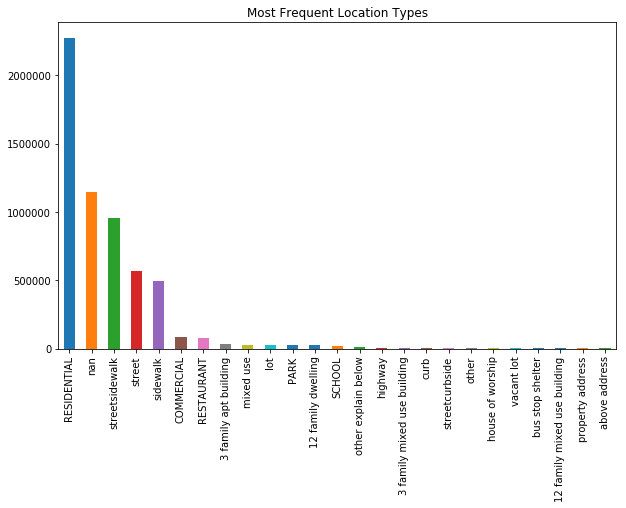

In [94]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

## Status Variable

In [95]:
df['Status'].unique()

array(['Closed', 'Pending', 'Assigned', 'Started', 'Open', 'In Progress',
       'Unassigned'], dtype=object)

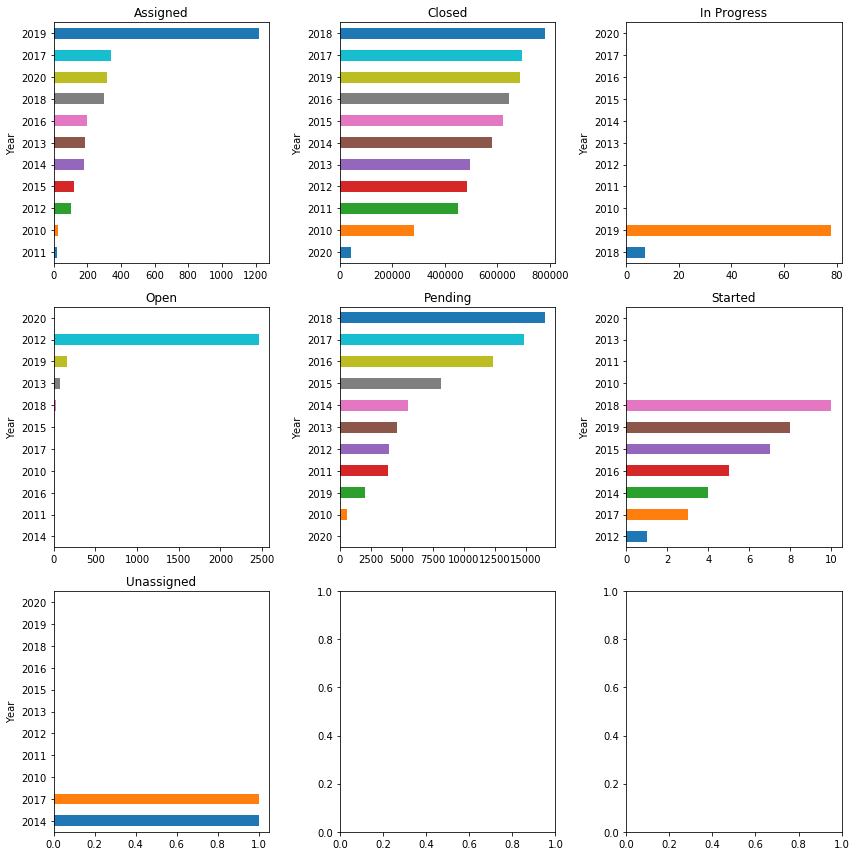

In [96]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [97]:
df[df['Status']!='Closed'][["Complaint Type","Status","Descriptor","Year","Resolution Description"]]

,Complaint Type,Status,Descriptor,Year,Resolution Description
18,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
20,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
138,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
293,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
294,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
402,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
418,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
451,Other Complaints,Pending,request clean vacant lot,2014,department sanitation found open service request already exists loc
544,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
545,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item


#### Derelict Vehicle means Abondend Vehicle they cant stay for years on streets some one will report or authorities with take a look so the incidents below certain year can be removed as they forgot to close the request
It can be observed that

1. There are many direlict vehicle complaints reported few years ago and "Department of Sanitation has removed vehicles" but the incidents were not closed

##### I have to remove above rows as they are outliers and are supposed to be closed

In [98]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
18,27842757,2014-04-14 16:27:00,2014-04-14 16:27:00,DSNY,BCC - Brooklyn North,StreetComplaints,derelict vehicl,street,11207,784 BARBEY STREET,...,Unspecified,BROOKLYN,40.663257,-73.884434,"(40.66325717246103, -73.88443359446283)",0.0,0.0,2014,4,0
20,27842761,2014-04-14 01:04:00,2014-04-14 12:00:00,DSNY,BCC - Brooklyn South,StreetComplaints,derelict vehicl,street,11230,87 LAWRENCE AVENUE,...,Unspecified,BROOKLYN,40.629645,-73.975715,"(40.629645138740855, -73.9757145351734)",0.0,0.0,2014,4,0
138,27843626,2014-04-14 07:52:00,2014-04-14 12:00:00,DSNY,BCC - Brooklyn North,StreetComplaints,derelict vehicl,street,11203,NaN,...,Unspecified,BROOKLYN,40.643485,-73.944900,"(40.64348469873948, -73.944900447275)",0.0,0.0,2014,4,0
293,27844563,2014-04-14 08:43:00,2014-04-14 12:00:00,DSNY,BCC - Brooklyn South,StreetComplaints,derelict vehicl,street,11229,NaN,...,Unspecified,BROOKLYN,40.589096,-73.920959,"(40.589096368302314, -73.92095903427312)",0.0,0.0,2014,4,0
294,27844564,2014-04-14 02:21:00,2014-04-14 12:00:00,DSNY,BCC - Brooklyn South,StreetComplaints,derelict vehicl,street,11235,3047 BRIGHTON 13 STREET,...,Unspecified,BROOKLYN,40.579066,-73.956160,"(40.57906647088695, -73.95616014937606)",0.0,0.0,2014,4,0
402,27845446,2014-04-14 22:54:00,2014-04-14 22:54:00,DSNY,BCC - Brooklyn North,StreetComplaints,derelict vehicl,street,11226,6 PARKSIDE COURT,...,Unspecified,BROOKLYN,40.655950,-73.960867,"(40.655949811564184, -73.96086699951935)",0.0,0.0,2014,4,0
418,27845511,2014-04-14 09:45:00,2014-04-14 12:00:00,DSNY,BCC - Brooklyn South,StreetComplaints,derelict vehicl,street,11218,950 MACDONALD AVENUE,...,Unspecified,BROOKLYN,40.631141,-73.977252,"(40.63114136323867, -73.97725235685037)",0.0,0.0,2014,4,0
544,27846398,2014-04-14 12:10:00,2014-04-14 12:10:00,DSNY,BCC - Brooklyn North,StreetComplaints,derelict vehicl,street,11212,284 JUNIUS STREET,...,Unspecified,BROOKLYN,40.667742,-73.902500,"(40.667742405069916, -73.90249984182238)",0.0,0.0,2014,4,0
545,27846401,2014-04-14 15:03:00,2014-04-14 15:03:00,DSNY,BCC - Brooklyn South,StreetComplaints,derelict vehicl,street,11210,4224 AVENUE H,...,Unspecified,BROOKLYN,40.632383,-73.935748,"(40.63238277403355, -73.93574769620282)",0.0,0.0,2014,4,0
679,27847372,2014-04-14 19:09:00,2014-04-14 19:09:00,DSNY,BCC - Brooklyn North,StreetComplaints,derelict vehicl,street,11233,2402 ATLANTIC AVENUE,...,Unspecified,BROOKLYN,40.676042,-73.905588,"(40.67604244337487, -73.90558814401315)",0.0,0.0,2014,4,0


##### I am changing the status of those incidents that has to be closed 

In [99]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

    

In [100]:
#df.drop(df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )].index,inplace = True)

In [101]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek


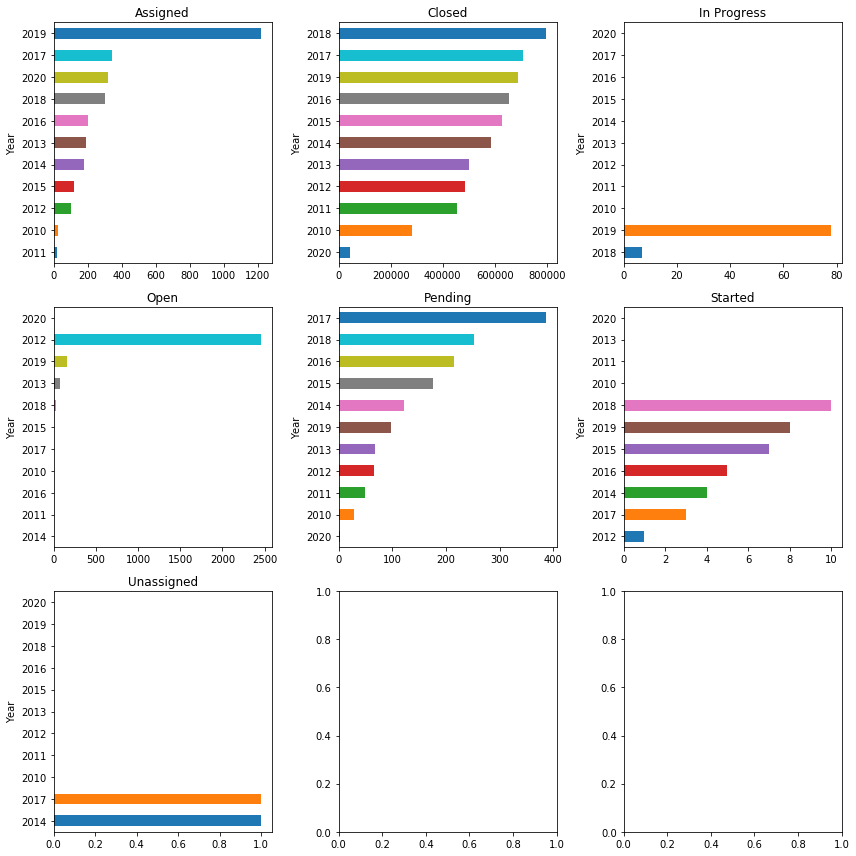

In [102]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [103]:
df.shape

(5840401, 34)

In [ ]:
#df = df[df['Location Type'] != 'nan']

In [106]:
df['Location Type'].value_counts()

RESIDENTIAL                           2272802
nan                                   1147298
streetsidewalk                        957818 
street                                568278 
sidewalk                              493383 
COMMERCIAL                            87448  
RESTAURANT                            75333  
3 family apt building                 36911  
mixed use                             27892  
lot                                   27551  
PARK                                  25933  
12 family dwelling                    25730  
SCHOOL                                18134  
other explain below                   12207  
highway                               6060   
3 family mixed use building           6055   
curb                                  5349   
streetcurbside                        4794   
other                                 4364   
house of worship                      4364   
vacant lot                            3783   
bus stop shelter                  

In [107]:
df[["Location","Location Type","Latitude","Longitude","Incident Address"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address
0,"(40.63137607740962, -73.93690514641224)",nan,40.631376,-73.936905,1707 ALBANY AVENUE
1,"(40.65575937956233, -73.957915385467)",nan,40.655759,-73.957915,398 PARKSIDE AVENUE
2,"(40.651769462936095, -73.96982500664355)",nan,40.651769,-73.969825,24 PARKSIDE AVENUE
3,"(40.606983639606455, -73.9915042331188)",nan,40.606984,-73.991504,2107 79 STREET
4,"(40.68557622732326, -73.97927459764733)",other explain below,40.685576,-73.979275,STATE STREET
5,"(40.689063949985375, -73.9992319517107)",nan,40.689064,-73.999232,400 HICKS STREET
6,"(40.635139121129946, -73.91543522425351)",nan,40.635139,-73.915435,752 EAST 78 STREET
7,"(40.707595790014565, -73.96186102985845)",nan,40.707596,-73.961861,NaN
8,"(40.644792701370726, -73.95457828379143)",12 family dwelling,40.644793,-73.954578,2409 BEVERLY ROAD
9,"(40.58321047357196, -73.9620472674295)",3 family mixed use building,40.583210,-73.962047,637 BANNER AVENUE


In [110]:
df[df["Incident Address"]== "1707 ALBANY AVENUE"][["Incident Address","Location Type","Descriptor"]]

,Incident Address,Location Type,Descriptor
0,1707 ALBANY AVENUE,nan,dirty water w
52461,1707 ALBANY AVENUE,street,one address
112415,1707 ALBANY AVENUE,sidewalk,request large bulky item collect


A location Type can be different in same area . We cannot predict it either drop it and see how model works or go ahead with modelling

###########################################################################################################################
#################################################################################################################################################

## MULTI CLASS CLASSIFICATION  

----> Example : A fruit is ORANGE ,APPLE OR PEAR but not both or all three

1. As it is a classification task with more than 2 classes and "IMBALANCED DATASET" 
2. (Classification classess are not of same quanitiy)
3. I want to use LOGISTIC REGRESSION / KERAS/ CSR MATRIX CROSS VALIDATION
 

In [111]:
df_model = df[["Agency","Descriptor","Complaint Type","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [112]:
df_model.dropna(how='any')

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,DEP,dirty water w,WaterComplaints,nan,Brooklyn,Closed,department environmental protection resolved complaint speaking complainant phon,40.631376,-73.936905,0.0,0.0,2014,4,0
1,DEP,hydrant running wc,WaterComplaints,nan,Brooklyn,Closed,department environmental protection determined complaint duplicate previously filed complaint original complaint address,40.655759,-73.957915,0.0,0.0,2014,4,0
2,DEP,hydrant running wc,WaterComplaints,nan,Brooklyn,Closed,department environmental protection determined complaint duplicate previously filed complaint original complaint address,40.651769,-73.969825,0.0,0.0,2014,4,0
3,DEP,leak use comments wa,WaterComplaints,nan,Brooklyn,Closed,department environmental protection determined complaint duplicate previously filed complaint original complaint address,40.606984,-73.991504,0.0,0.0,2014,4,0
4,DOHMH,rat sight,rodent,other explain below,Brooklyn,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.685576,-73.979275,35.0,35.0,2014,4,0
5,DEP,leak use comments wa,WaterComplaints,nan,Brooklyn,Closed,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint,40.689064,-73.999232,0.0,0.0,2014,4,0
6,DEP,waterlow pressure wa,WaterComplaints,nan,Brooklyn,Closed,department environmental protection investigated complaint determined inside condition within complainants properti,40.635139,-73.915435,0.0,0.0,2014,4,0
7,DEP,water problem use comments wzz,WaterComplaints,nan,Brooklyn,Closed,department environmental protection investigated complaint repaired replaced hydr,40.707596,-73.961861,1.0,1.0,2014,4,0
8,DOHMH,rat sight,rodent,12 family dwelling,Brooklyn,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.644793,-73.954578,4.0,4.0,2014,4,0
9,DOHMH,rat sight,rodent,3 family mixed use building,Brooklyn,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.583210,-73.962047,18.0,18.0,2014,4,0


In [113]:
df_model.shape

(5840401, 14)

In [114]:
df_model_label = df_model.copy()

In [115]:
label_encoder = LabelEncoder()
df_model_label['Agency']=label_encoder.fit_transform(df_model['Agency'])
df_model_label['Descriptor']=label_encoder.fit_transform(df_model['Descriptor'])
df_model_label['City']=label_encoder.fit_transform(df_model['City'])
df_model_label['Status']=label_encoder.fit_transform(df_model['Status'])
df_model_label['Resolution Description']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model_label['Complaint Type']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model_label['Location Type']=label_encoder.fit_transform(df_model['Location Type'])

In [116]:
df_model_label.head()

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,2,294,15,58,3,1,398,40.631376,-73.936905,0.0,0.0,2014,4,0
1,2,525,15,58,3,1,234,40.655759,-73.957915,0.0,0.0,2014,4,0
2,2,525,15,58,3,1,234,40.651769,-73.969825,0.0,0.0,2014,4,0
3,2,595,15,58,3,1,234,40.606984,-73.991504,0.0,0.0,2014,4,0
4,8,793,25,61,3,1,514,40.685576,-73.979275,35.0,35.0,2014,4,0


## Feature Engineering

### Correlation

1. Correlation is from 0 to 1 where 0 indicates least correlation and 1 indicates highest

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
Agency,1.000000,-0.119932,-0.189065,-0.167599,-0.002146,0.013971,0.574017,0.017066,0.058589,-0.109665,-0.115101,0.071886,0.017152,0.073027
Descriptor,-0.119932,1.000000,0.120085,-0.201271,0.003129,-0.003440,-0.050192,0.044971,0.010868,0.033737,0.034583,-0.061316,-0.009280,-0.007414
Complaint Type,-0.189065,0.120085,1.000000,0.288310,-0.004506,0.011524,0.044719,-0.031197,-0.048784,-0.001287,-0.004749,0.047577,-0.001005,-0.039399
Location Type,-0.167599,-0.201271,0.288310,1.000000,-0.000077,-0.005107,0.195498,-0.105942,-0.117573,0.046642,0.049925,0.076148,0.005977,-0.024963
City,-0.002146,0.003129,-0.004506,-0.000077,1.000000,-0.000137,-0.004590,0.008285,0.005196,-0.000996,-0.001060,-0.004890,-0.001964,-0.000002
Status,0.013971,-0.003440,0.011524,-0.005107,-0.000137,1.000000,0.005619,0.003940,0.005900,-0.002849,-0.005517,-0.015890,-0.001038,0.000644
Resolution Description,0.574017,-0.050192,0.044719,0.195498,-0.004590,0.005619,1.000000,0.002744,-0.012404,-0.155128,-0.171934,0.082692,0.018003,0.112089
Latitude,0.017066,0.044971,-0.031197,-0.105942,0.008285,0.003940,0.002744,1.000000,0.310220,-0.010651,-0.011041,0.014857,0.004196,0.022574
Longitude,0.058589,0.010868,-0.048784,-0.117573,0.005196,0.005900,-0.012404,0.310220,1.000000,-0.010963,-0.012012,-0.013621,0.003538,0.004570
Total_Time,-0.109665,0.033737,-0.001287,0.046642,-0.000996,-0.002849,-0.155128,-0.010651,-0.010963,1.000000,0.916914,-0.053840,0.003907,-0.029393


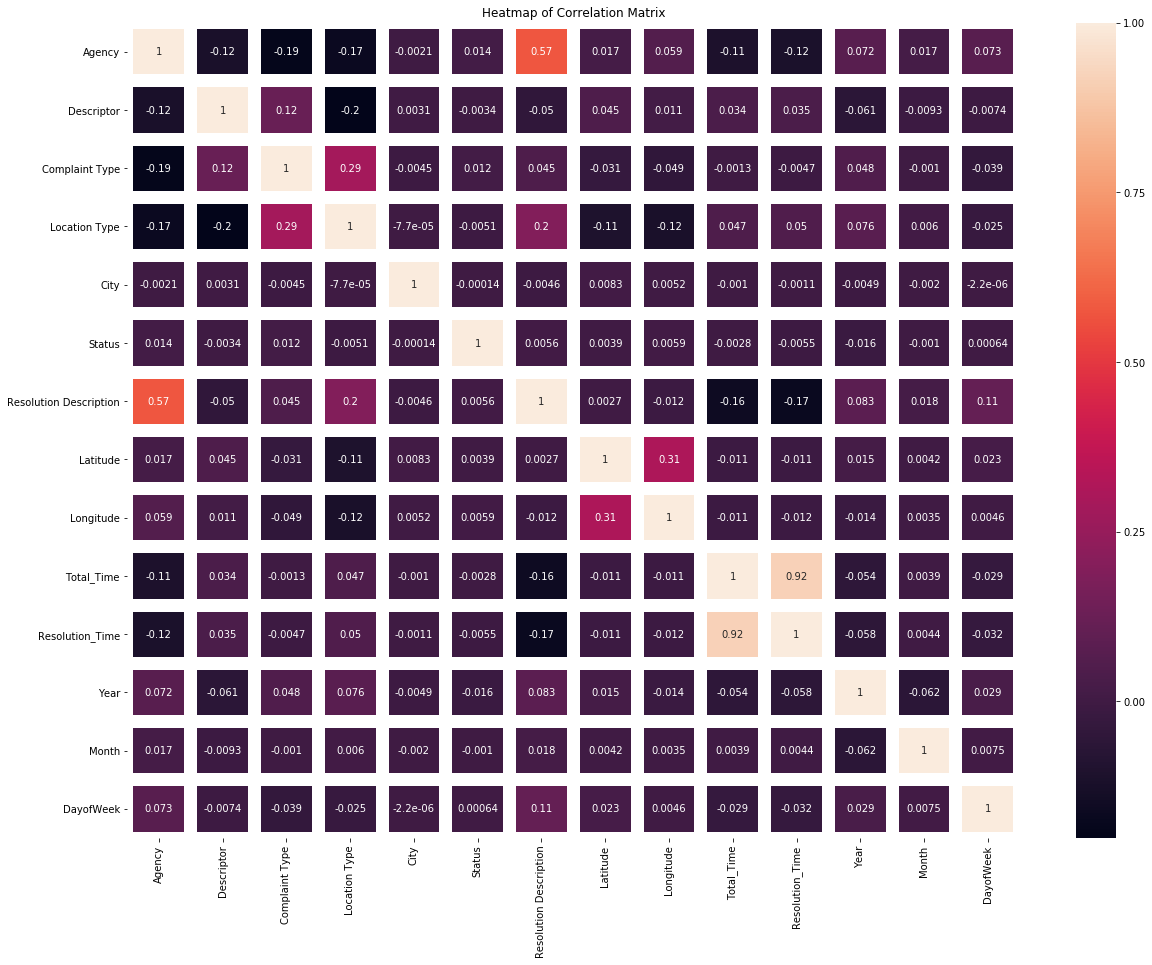

In [117]:
corr = df_model_label.corr()
fig, ax = plt.subplots(figsize=(20,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
corr

My one to one correlatio may not be that effective and its not a matter of concern but we add two or more variables they have significant effect on my dependent variable as this is not a linear relationship

1. Complaint Type is correlated to Location Type
2. Resolution Description and Agency are correlated

#### Checking what variables are most important feature for my target varaible

In [118]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

X = df_model[["Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type"]

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)

### Feature Importance and Selection

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Descriptor                0.420344
Resolution Description    0.167093
Agency                    0.156300
Location Type             0.137458
Total_Time                0.035176
Resolution_Time           0.034411
Year                      0.028784
Month                     0.011599
DayofWeek                 0.008626
Status                    0.000184
City                      0.000025
dtype: float64

No handles with labels found to put in legend.


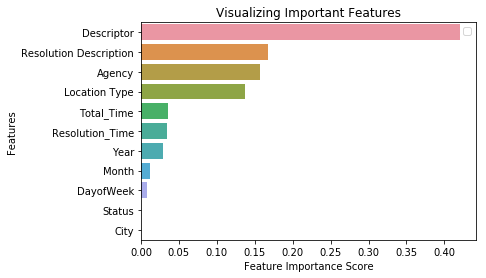

In [120]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Baseline Model : Logistic Regression

In [124]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [125]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
import sklearn.metrics as metrics
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 408560
Accuracy: 0.51


####### the above gives the misclassifed samples 
##### Evaluate the model thru Confusion Matrix but here its multi class so hard to understand but lets calculate precision and accuracy

In [134]:
cnf_matrix = metrics.confusion_matrix(test_lbl, y_pred)
cnf_matrix

array([[  484,  8790,     0,  5798,     0,     0,   632,  1025,  1153,
            0,  1826,     0, 11633,     0,    17,   657,     0,     0,
            0,     0,     0,     0,     0,     0,    54,     0],
       [  457, 25288,     0, 14311,     0,     0,  1129,  5513,  1013,
            0,  1740,     0,  8590,     0,     4,   425,     1,     0,
            0,     0,     0,    10,     0,  4855,   192,     0],
       [    0,     0,     0,     0,     0,     0,    41,     4,     0,
            0,     0,     0,    17,     0,   306,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    2,   705,     0, 68346,     0,     0, 11856,     0,     0,
            0,   126,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     3,     0,     0,     0,     0],
       [    1,   131,     0,    14,    46,     0,   466,     0,     0,
            0,     0,     0,   186,     0,     9,     0,     0,     0,
            0,     0,     0,  

We have to take accuracy into consideration as it is very less for our baseline model lets try with random forest classifer as tree based modelsa are robust and works well for classification

In [135]:
np.diag(cnf_matrix)

array([  484, 25288,     0, 68346,    46,     0, 96858,  1635,  1852,
       91114,  1134,   320, 87120,  2749,  1133, 24757,  2920,     0,
        5731,     0,     0,     7,    52,  2229,  4864,  7144],
      dtype=int64)

In [136]:
np.sum(cnf_matrix, axis = 0)

array([  4573,  93358,      3, 120984,     56,      0, 155569,   8925,
         5582, 130347,  10830,    972, 193211,   3260,   5763,  61413,
         2979,    487,   5917,      0,      0,     25,    184,   9136,
        10129,  10640], dtype=int64)

In [137]:
recall = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1))

In [138]:
(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.10583862, 0.27087127, 0.        , 0.56491768, 0.82142857,
              nan, 0.62260476, 0.18319328, 0.33178072, 0.6990111 ,
       0.10470914, 0.32921811, 0.450906  , 0.84325153, 0.19659899,
       0.40312312, 0.9801947 , 0.        , 0.96856515,        nan,
              nan, 0.28      , 0.2826087 , 0.24397986, 0.48020535,
       0.67142857])

In [139]:
precision = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [140]:
print("precision",precision)
print("recall",recall)

precision nan
recall 0.32436859588640854


Accuracy is the main metric for multi class classification as precision and recall scores doesnt play an important role as we are taking aaverage of individual classes (Each complaint Type)

### Random Forests Classification

My favourite is tree based models as they work faster and works well with classification 
Its used to identify feature importance too

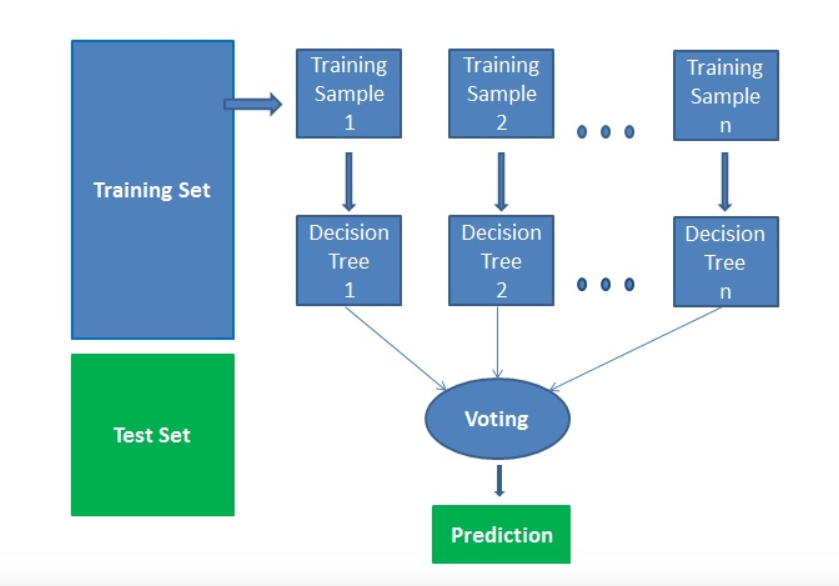

In [141]:
from IPython.display import Image
Image(filename='rf.png')

In [142]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

In [143]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9947943092971319


In [144]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 9121


#### Checking if my model is overfitting --- 10 Fold CV

In [145]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.94213368 0.92872027 0.92866315 0.89021718 0.90230121 0.89441594
 0.89734006 0.93039275 0.91204405 0.94888619]


My number of missclassifed samples are extremely less and thats why accuracy score went up which is good

Even my cross validation scores are pretty high so my model is fine

Ideas!!

How  about holidays and Season? Does these complaints go up or what kind of complaints can be expected


## Season

In [ ]:
conditions =[
    (df['Month']==1 )| (df['Month']==12)| (df['Month']==2),
    (df['Month']==3) | (df['Month']==4) | ( df['Month']==5),
    (df['Month']==6) | (df['Month']==7) | (df['Month']==8),
    (df['Month']==9)|(df['Month']==10)| (df['Month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

##### TF IDF

#df_model_loctype = df[["Agency","Location","Location Type","City","Incident Zip","Latitude","Longitude"]]
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix

## APPLYING COUNT VECTORIZATION THAT CONVERTS IT INTO A SPARSE AMTRIX

cv = CountVectorizer(min_df=10)
X_ResDes = cv.fit_transform(df['Resolution Description'])
X_ResDes

##############################################################################################

cv = CountVectorizer()
X_LocType = cv.fit_transform(df['Location Type'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_LocType
#################################################################################################

## TF IDF Vectorization ----> More importance is given to rare words
## Count Vectorizor --> Gives the frequencies of Words
## Label Binarizer --> Coverts G,B,R --> 1,2,3

################################################################################################

cv = CountVectorizer()
X_Des = cv.fit_transform(df['Descriptor'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_Des

###############################################################################################

# Apply TFIDF to "resolution_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df['Resolution Description'])

tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df['Descriptor'])

# Apply LabelBinarizer to "brand_name"
lb = LabelBinarizer(sparse_output=True)
X_Loc = lb.fit_transform(df['Location Type'])

# Apply LabelBinarizer to "brand_name"
lb = LabelBinarizer(sparse_output=True)
X_Com = lb.fit_transform(df['Complaint Type'])

#####################################################################################################

####### Creating CSR Matrix

####### Merging the Sparse Matrices

# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df[['Agency','City', 'Status','Latitude',
                                                'Longitude','Total_Time','Resolution_Time',
                                                'Year','Month','DayofWeek']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_Loc,X_Com)).tocsr()

####################################################################################################

X_train = sparse_merge[:len(df)]

y = sparse_merge[len(df):]

from sklearn.model_selection import KFold
eval_size = .10
kf = KFold(10,shuffle=False)
i = 0
for train_indicies, valid_indicies in kf.split(X_train,y):
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, y_train = X_train[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train[valid_indicies], y[valid_indicies]
    i = i+1